In [1]:
%matplotlib inline

import pickle
import random
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

In [2]:
### load up some practice data with outliers in it

ages = pickle.load(open("tools/practice_outliers_ages.pkl", "rb"))
net_worths = pickle.load(open("tools/practice_outliers_net_worths.pkl", "rb"))

In [3]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features

ages = np.reshape(np.array(ages), (len(ages), 1))
net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths,
                                                                            test_size=0.1, random_state=42)

In [4]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
print(reg.coef_[0])
print(reg.score(ages_test, net_worths_test))

[ 5.07793064]
0.878262470366


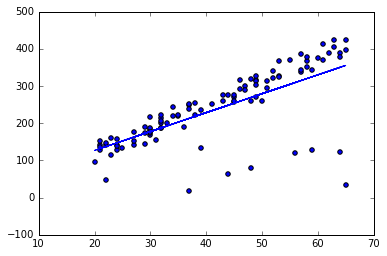

In [6]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [7]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    Data = namedtuple("Data", ['age', 'net_worth', 'error'])
    
    for p, a, n in zip(predictions, ages, net_worths):
        cleaned_data.append((a, n, abs(n-p)))
        
    result_length = int(len(cleaned_data) * 0.9)
    cleaned_data = sorted(cleaned_data, key=lambda tup: tup[2])
    cleaned_data = cleaned_data[:result_length]

    return cleaned_data

In [8]:
### identify and remove the most outlier-y points

cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner(predictions, ages_train, net_worths_train)
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")

[[ 6.36859481]]
0.983189455396


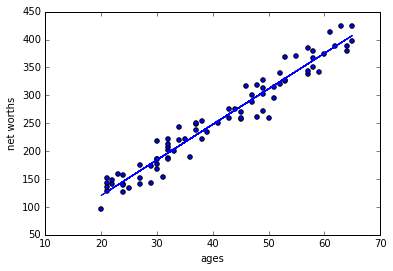

In [9]:
### only run this code if cleaned_data is returning data

if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages = np.reshape(np.array(ages), (len(ages), 1))
    net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        print(reg.coef_)
        print(reg.score(ages_test, net_worths_test))
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")

---
# Enron Outliters

In [10]:
from tools.feature_format import featureFormat, targetFeatureSplit

In [11]:
### read in data dictionary, convert to numpy array
data_dict = pickle.load(open("tools/final_project_dataset.pkl", "rb"))
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

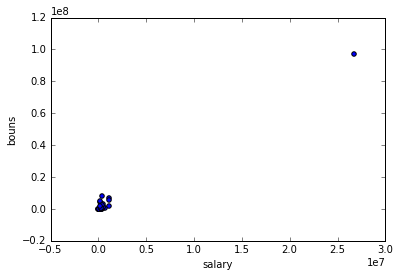

In [12]:
for point in data:
    salary = point[0]
    bouns = point[1]
    plt.scatter(salary, bouns)

plt.xlabel("salary")
plt.ylabel("bouns")
plt.show()

In [13]:
bonus = max(data, key=lambda d: d[0])[1]

In [14]:
for key, value in data_dict.items():
    if value['bonus'] == bonus:
        print(key)

TOTAL


In [15]:
data_dict.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [16]:
data = featureFormat(data_dict, features)

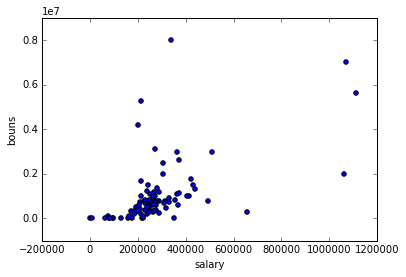

In [17]:
for point in data:
    salary = point[0]
    bouns = point[1]
    plt.scatter(salary, bouns)

plt.xlabel("salary")
plt.ylabel("bouns")
plt.show()

In [18]:
for d in data:
    if d[1] > 5000000 and d[0] >  1000000:
        print(d)

[ 1072321.  7000000.]
[ 1111258.  5600000.]


In [19]:
for key, value in data_dict.items():
    if value['salary'] == 1072321:
        print(key)
    elif value['salary'] == 1111258:
        print(key)

LAY KENNETH L
SKILLING JEFFREY K
